In [1]:
from google.colab import files
data=files.upload()

Saving diabetes.csv to diabetes.csv


In [2]:
ls


diabetes.csv  sample_data/


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
h=df.corr()['Outcome'].sort_values(ascending=True)
h

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

In [9]:

# Assuming df is your DataFrame and you want to find correlations with the 'Outcome' column
h = df.corr()['Outcome'].sort_values(ascending=True)

# Convert the Series 'h' to a DataFrame
h_df = h.reset_index()
h_df.columns = ['Feature', 'Correlation']
# Plotting
h_df

,Feature,Correlation
0,BloodPressure,0.065068
1,SkinThickness,0.074752
2,Insulin,0.130548
3,DiabetesPedigreeFunction,0.173844
4,Pregnancies,0.221898
5,Age,0.238356
6,BMI,0.292695
7,Glucose,0.466581
8,Outcome,1.000000


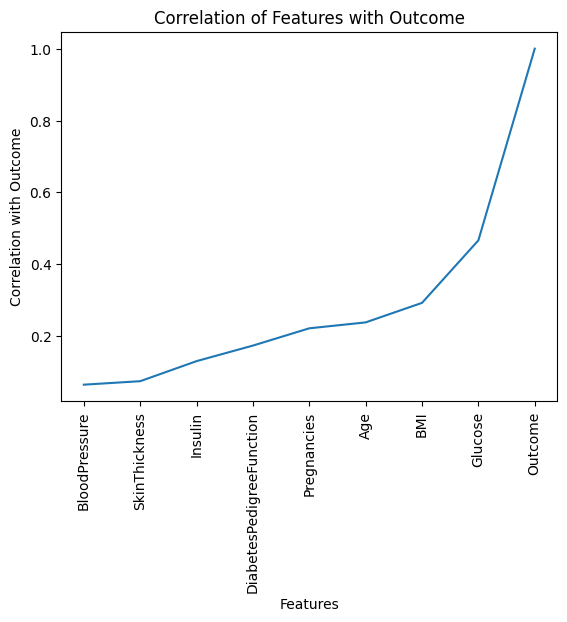

In [10]:
sns.lineplot(data=h_df, x='Feature', y='Correlation')
plt.xticks(rotation=90)  # Rotate feature names on x-axis for better readability
plt.xlabel('Features')
plt.ylabel('Correlation with Outcome')
plt.title('Correlation of Features with Outcome')
plt.show()

In [11]:
df.nunique()


Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [12]:
df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
x=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [14]:
y=df['Outcome']
y.size

768

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)


In [16]:
xtrain.shape


(614, 8)

In [17]:
ytrain.shape


(614,)

In [18]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
hh=lr.predict(xtest)
hh

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
round(accuracy_score(ytest,hh)*100,2)

74.68

In [21]:
confusion_matrix(ytest,hh)


array([[78, 21],
       [18, 37]])

In [22]:
precision_score(ytest,hh)*100


63.793103448275865

In [23]:
recall_score(ytest,hh)*100


67.27272727272727

decision tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
g=dt.predict(xtest)
accuracy_score(ytest,g)*100

74.67532467532467

Random forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
j=0
for i in range(1,20):
  rf=RandomForestClassifier(n_estimators=i)
  rf.fit(xtrain,ytrain)
  kk=rf.predict(xtest)
  a=accuracy_score(ytest,kk)
  if a>j:
    j=a
    index=i
print(j,index)

0.7727272727272727 15


In [26]:
from sklearn.neighbors import KNeighborsClassifier
j=0
for i in range(1,20):
  rf=KNeighborsClassifier(n_neighbors=i)
  rf.fit(xtrain,ytrain)
  kk=rf.predict(xtest)
  a=accuracy_score(ytest,kk)
  if a>j:
    j=a
    index=i
print(j,index)

0.7792207792207793 12


svm

In [27]:
from sklearn.svm import SVC
sv=SVC(kernel='poly',degree=3)
sv.fit(xtrain,ytrain)
m=sv.predict(xtest)
accuracy_score(ytest,m)*100

75.97402597402598

In [28]:
from sklearn.svm import SVC
sv=SVC(kernel='sigmoid',degree=3)
sv.fit(xtrain,ytrain)
m=sv.predict(xtest)
accuracy_score(ytest,m)*100

55.1948051948052

In [29]:
from sklearn.svm import SVC
sv=SVC(kernel='rbf',degree=3)
sv.fit(xtrain,ytrain)
m=sv.predict(xtest)
accuracy_score(ytest,m)*100

76.62337662337663

In [30]:
x.head(2)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31


In [31]:
y.head(2)


0    1
1    0
Name: Outcome, dtype: int64

In [36]:
from sklearn.neighbors import KNeighborsClassifier
Pregnancies = int(input("Enter a Pregnancies: "))
Glucose = int(input("Enter a Glucose: "))
BloodPressure = int(input("Enter a BloodPressure: "))
SkinThickness = int(input("Enter a SkinThickness: "))
Insulin = int(input("Enter an Insulin: "))
BMI = float(input("Enter a BMI: "))
DiabetesPedigreeFunction = float(input("Enter a DiabetesPedigreeFunction: "))
Age = int(input("Enter an Age: "))

# Create a list for the input data
input_data = [[Pregnancies,Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]]

# Example: Using KNeighborsClassifier
rf = KNeighborsClassifier(n_neighbors=18)
rf.fit(xtrain, ytrain)

# Predict with the trained classifier
prediction = rf.predict(input_data)

# Output the result based on the prediction
if prediction == 0:
    print('This person does not have diabetes.')
else:
    print('This person has diabetes.')
ll=round(accuracy_score(ytest,kk)*100,2)
print(f' Right prediction between 1-100 percengate is {ll} % is right prediction')


Enter a Pregnancies: 54
Enter a Glucose: 59
Enter a BloodPressure: 52
Enter a SkinThickness: 89
Enter an Insulin: 26
Enter a BMI: 14
Enter a DiabetesPedigreeFunction: 5
Enter an Age: 26
This person does not have diabetes.
 Right prediction between 1-100 percengate is 75.32 is right prediction


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
